In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Data Preparation

In [89]:
# Importing Training Data
Xtrain = pd.read_csv('Datasets/Training Data/Linear_X_Train.csv')
Ytrain = pd.read_csv('Datasets/Training Data/Linear_Y_Train.csv')
print(Xtrain.shape,Ytrain.shape)

(3750, 1) (3750, 1)


In [90]:
# Importing Test Data
Xtest = pd.read_csv('Datasets/Test Cases/Linear_X_Test.csv')
print(Xtest.shape)

(1250, 1)


In [91]:
# Convert X and Y to Numpy Arrays
Xtrain = Xtrain.values
Ytrain = Ytrain.values
Xtest = Xtest.values

In [92]:
# Normalization/ Standardization
Mean = Xtrain.mean()
Std = Xtrain.std()
Xtrain = (Xtrain - Mean) / Std

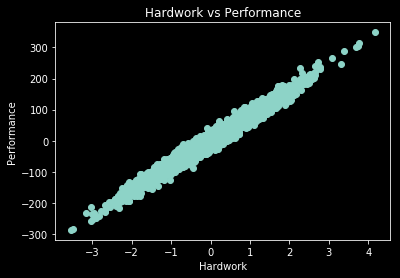

In [93]:
# Visualization
plt.style.use('dark_background')
plt.scatter(Xtrain,Ytrain)
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title("Hardwork vs Performance")
plt.show()

##### Algorithm

In [101]:
class LinearRegression:
    def __init__(self):
        self.theta = np.zeros((2,))

    def hypothesis(self,x):
        yhat = theta[0] + self.theta[1]*x
        return yhat
    
    def error(self,X,Y):
        m = X.shape[0]
        err = 0
        for i in range(m):
            y = Y[i]
            x = X[i]
            yhat = self.hypothesis(x)
            err += (y - yhat)**2 
        return err/m

    def gradient(self,X,Y):
        m = X.shape[0]
        grad = np.zeros((2,))
        for i in range(m):
            x = X[i]
            y = Y[i]
            yhat = self.hypothesis(x)
            
            grad[0] += (yhat-y)
            grad[1] += (yhat-y)*x
        return grad/m
    
    def fit(self,X, Y, learning_rate = 0.1, epochs = 100):
        error_list = []
        
        for i in range(epochs):
            
            # Compute Gradients
            grad = self.gradient(X,Y)
            
            # Find the error 
            e = self.error(X,Y)
            error_list.append(e)
            
            # Update the values of coefficient theta
            self.theta[0] = self.theta[0] - learning_rate*grad[0]
            self.theta[1] = self.theta[1] - learning_rate*grad[1]
                        
        return self.theta,error_list
    
    def predict(self,X):
        m = X.shape[0]
        preds = []
        for i in range(m):
            x = X[i]
            pred = self.hypothesis(x)
            preds.append(pred)
        return preds
    
    def score(self,y,yhat):
        num = np.sum((y-yhat)**2)
        denom = np.sum((y-y.mean())**2)
        
        score = 1 - num/denom
        return score

In [102]:
# Creating an Object
obj = LinearRegression()

In [103]:
# Apply Machine Learning algorithm to fit the training data
coeff, error = obj.fit(Xtrain,Ytrain)
# Optimal Estimate of the Coefficient
print(coeff)

[1.81645164e-04 7.99036145e+01]


##### Plot of Error over time

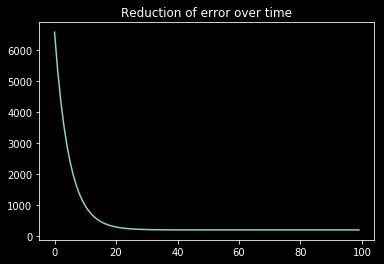

In [104]:
plt.plot(error)
plt.title('Reduction of error over time')
plt.show()

##### Plotting the Best Fit Line

In [105]:
# Predictions on Test Data
predictions = obj.predict(Xtest)
print(predictions[:5])

[array([-149.37069577]), array([-68.75494042]), array([-201.48687035]), array([221.23424289]), array([47.90689732])]


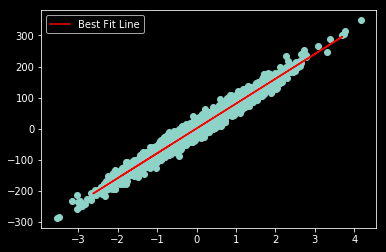

In [106]:
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtest,predictions, color = 'red', label = 'Best Fit Line')
plt.legend()
plt.show()

##### Assessing the Accuracy

In [107]:
# Calculating accuracy
prediction = obj.predict(Xtrain)
obj.score(Ytrain,prediction)

0.9709612226971643